In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
CUBE = pd.read_excel("CUBE\Group 3-Cube.xlsx")
results_1A = pd.read_csv("results_TOP.csv")
T_mrt_globe = results_1A["T_MRT"]

In [8]:
T_mrt_cube = CUBE["Mean Radiant Temperature (*C)"]


CUBE["Full DateTime"] = pd.to_datetime(
    pd.Timestamp.today().strftime("%Y-%m-%d") + " " + CUBE.iloc[:, 1].astype(str)
)
# Convert time column to datetime before extracting min/max
CUBE["Full DateTime"] = pd.to_datetime(CUBE["Full DateTime"])
start_time = CUBE["Full DateTime"].min()
end_time = CUBE["Full DateTime"].max()

# Generate full second-by-second time range
time_range = pd.date_range(start=start_time, end=end_time, freq='1S')
full_time_df = pd.DataFrame({"Full DateTime": time_range})

# Compute average temperature from HOBO sensors
T_avg = (HOBO_low.iloc[:, 1] + HOBO_mid.iloc[:, 1] + HOBO_top.iloc[:, 1]) / 3

# Extract Mean Radiant Temperature with Time
T_mrt_cube = CUBE[["Full DateTime", "Mean Radiant Temperature (*C)"]]
T_mrt_cube = pd.merge(full_time_df, T_mrt_cube, how="left", on="Full DateTime")
T_mrt_cube ["Mean Radiant Temperature (*C)"].fillna(0, inplace=True)

T_avg = T_avg.reset_index(drop=True)
T_mrt_cube = T_mrt_cube["Mean Radiant Temperature (*C)"].reset_index(drop=True)
HOBO_low = HOBO_low.reset_index(drop=True)

#T_op = []
#for i in range(T_avg.size):
 #   air_speed = HOBO_low["Air_speed (m/s)"][i]
  #  if T_mrt[i] == 0:
   #     continue
    #if air_speed < 0.2:
     #   T_op.append((T_mrt[i] + T_avg[i]) / 2)
   # elif air_speed < 0.6:
    #    T_op.append((0.4 * T_mrt[i] + 0.6 * T_avg[i]))
    #else:
     #   T_op.append((0.3 * T_mrt[i] + 0.7 * T_avg[i]))
#print(len(T_op))
T_mrt_cube
full_time_df


C:\Users\aarne\AppData\Local\Temp\ipykernel_14912\4189924782.py:13: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  time_range = pd.date_range(start=start_time, end=end_time, freq='1S')
C:\Users\aarne\AppData\Local\Temp\ipykernel_14912\4189924782.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_mrt_cube ["Mean Radiant Temperature (*C)"].fillna(0, inplace=True)


,Full DateTime
0,2025-04-10 09:15:00
1,2025-04-10 09:15:01
2,2025-04-10 09:15:02
3,2025-04-10 09:15:03
4,2025-04-10 09:15:04
...,...
7196,2025-04-10 11:14:56
7197,2025-04-10 11:14:57
7198,2025-04-10 11:14:58
7199,2025-04-10 11:14:59


In [34]:
T_mrt_diff = []
print(len(T_mrt_cube))
for i in range(len(T_mrt_cube)):
    if T_mrt_cube[i] == 0:
        T_mrt_diff.append(0)
    else:
        T_mrt_diff.append(T_mrt_cube[i]-T_mrt_globe[i])
print(T_mrt_diff)
diff = pd.DataFrame(T_mrt_diff, columns=["tmrt_cube - tmrt_globe"])
task3 = pd.concat([full_time_df, diff], axis=1)
print(task3.tail)



7201
[np.float64(0.2591577168591499), np.float64(-0.38338085482381956), np.float64(0.2208973988806875), 0, np.float64(0.23294510973675742), np.float64(0.22862898905520623), np.float64(0.2504473433308547), 0, np.float64(0.24948832107276786), np.float64(0.2842787680719674), np.float64(-0.38635790907738254), 0, np.float64(-0.3614413258633604), np.float64(-0.371441325863362), np.float64(-0.38144132586336), 0, np.float64(-0.36342612582999223), np.float64(0.29153807311011093), np.float64(-0.34342612582999266), 0, np.float64(0.26373809913209456), np.float64(-0.35441852596280654), np.float64(0.3119045890506982), 0, np.float64(-0.3446038552616173), np.float64(-0.3346038552616193), np.float64(0.27762189038854856), 0, np.float64(0.2888948435534502), np.float64(0.29548604820307034), np.float64(0.2778557645665174), 0, np.float64(-0.33758134562442876), np.float64(-0.3377914073957058), np.float64(-0.34779140739570735), 0, np.float64(-0.3429056687982417), np.float64(-0.3929056687982424), np.float64(-0

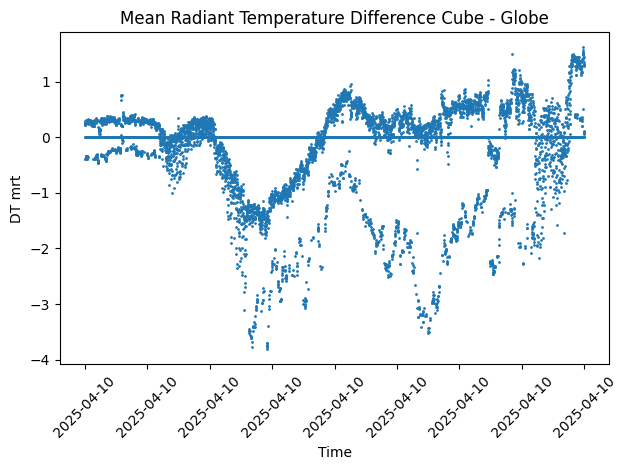

In [38]:

step = int(len(diff) / 8)
xticks = task3["Full DateTime"].iloc[::step]
plt.scatter(task3["Full DateTime"], diff, s=1)
plt.title("Mean Radiant Temperature Difference Cube - Globe")
plt.xlabel("Time")
plt.ylabel("DT mrt")
plt.xticks(xticks, rotation=45)
plt.tight_layout()
plt.show()


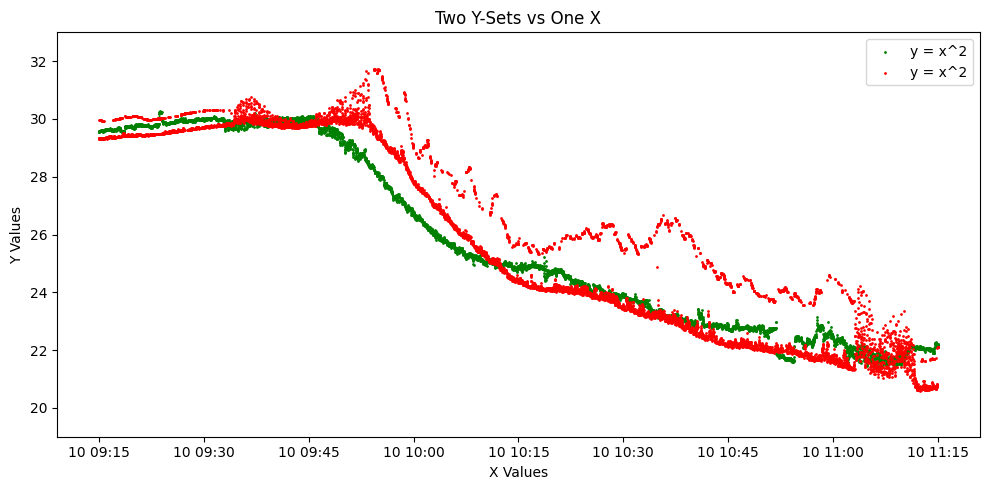

In [ ]:
plt.figure(figsize=(10, 5))  # Set fitting window size (width, height)

# Plot first y set
plt.scatter(task3["Full DateTime"], T_mrt_cube, label="Tmrt CUBE",s = 1, color='green')

# Plot second y set
plt.scatter(task3["Full DateTime"], T_mrt_globe, label="Tmrt globe",s = 1, color='red')

# Labels and title
plt.title("Tmrt : CUBE Sensor vs Globe Thermometer")
plt.xlabel("Time")
plt.ylabel("Tmrt [degrees C]")
plt.ylim(19, 33)
# Add legend to differentiate
plt.legend()

# Make sure layout fits well
plt.tight_layout()

# Show plot
plt.show()